<a href="https://colab.research.google.com/github/Arisoa04/IAE_METZ_DATA_2025_6/blob/main/tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude de cas

In [ ]:
#Cellule des variables
revenus = 100000
depenses = 75000
taux_imposition_frs = 0.27
taux_imposition_lxg = 0.17
taux_imposition_irl = 0.125

In [ ]:
#Cellule des calculs
benefice = revenus - depenses
impot_en_france = benefice * taux_imposition_frs
impot_au_lxg = taux_imposition_lxg * benefice
impot_en_irel = taux_imposition_irl * benefice

benefice_net_fr = benefice - impot_en_france

In [ ]:
#Cellule des checks/prints : calcul en direct
print ("Impot à payer en France", taux_imposition_frs*benefice, "euros")

Impot à payer en France 6750.0 euros


In [ ]:
print ("Impot à payer en Irelande", impot_en_irel, "euros")

Impot à payer en Irelande 3125.0 euros


In [ ]:
#Comparaison entre Irelande, Luxembourg
print("On compare au Luxembourg", taux_imposition_lxg*benefice, "euros", "vs en Ireland", impot_en_irel, "euros")

On compare au Luxembourg 4250.0 euros vs en Ireland 3125.0 euros


In [ ]:
impot_en_france - impot_au_lxg

2500.0

#Structure de contrôle

In [ ]:
# CONDITIONS (if, elif, else)
if benefice_net_fr > 0:
  print ("L'entreprise réalise un bénéfice net. Un bénéfice de", benefice_net_fr, "euros")
elif benefice_net_fr ==0:
  print("L'entreprise est à l'équilibre")
else:
  print("L'entreprise réalise une perte nette")

L'entreprise réalise un bénéfice net. Un bénéfice de 18250.0 euros


In [ ]:
#Utilisation du travail des autres

#IMPORTATION DES BIBLIOTHEQUES

### Les packages se différencient en 2 grandes catégories:
#### 1. "outils" : contenant des fonctions
#### 2. "de données" : contenant des données / valeurs

In [ ]:
#Le package d'outils le plus répandu en Python = pandas (il y a ausi POLARS)
import pandas as pd

In [ ]:
#Le package "données" le plus répandu en Python x FINANCE est .... YAHOO! Finance
import yfinance as yf

In [ ]:
# BLOCK : IMPORTATION DES PACKAGES
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#dans les packages "outils" vous pouvez SOUS SELECTIONNER LE CHAPITRE

In [ ]:
# BLOCK : VARIABLES
# pour une comparaison d'indices selon les pays
france_symbol = 'EWQ'
ireland_symbol = 'EWK'
luxembourg_symbol = 'SPY'

In [ ]:
# BLOCK : TIME FRAME
start_date = '2010-01-01'
end_date = '2025-01-01'

In [ ]:
# Téléchargement des données historiques de YFINANCE pour chaque pays

france_data = yf.download(france_symbol, start= start_date, end= end_date)
irelande_data = yf.download(ireland_symbol, start=start_date, end=end_date)
lux_data = yf.download(luxembourg_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(france_data)

Price           Close       High        Low       Open  Volume
Ticker            EWQ        EWQ        EWQ        EWQ     EWQ
Date                                                          
2010-01-04  17.787552  17.827419  17.641370  17.641370   97400
2010-01-05  17.741039  17.867285  17.674593  17.847353  164100
2010-01-06  17.834068  17.840713  17.687888  17.734400  117300
2010-01-07  17.754328  17.787551  17.634726  17.648015   87500
2010-01-08  18.000177  18.006822  17.760972  17.787551  155400
...               ...        ...        ...        ...     ...
2024-12-24  35.970001  36.009998  35.619999  35.730000  187100
2024-12-26  36.119999  36.200001  35.939999  35.959999  216600
2024-12-27  36.060001  36.139999  35.900002  35.959999  758900
2024-12-30  35.810001  35.910000  35.650002  35.900002  361400
2024-12-31  35.880001  36.169998  35.799999  36.169998  401800

[3774 rows x 5 columns]


In [ ]:
#Il y a des jours fériés donc il y a des valeurs nulles
france_data.isnull()
# DATA_FRAME.FUNCTION_NAME(PARAMETRE,...)
#france_data.isnull().sum()

Price,Close,High,Low,Open,Volume
Ticker,EWQ,EWQ,EWQ,EWQ,EWQ
Date,,,,,
2010-01-04,False,False,False,False,False
2010-01-05,False,False,False,False,False
2010-01-06,False,False,False,False,False
2010-01-07,False,False,False,False,False
2010-01-08,False,False,False,False,False
...,...,...,...,...,...
2024-12-24,False,False,False,False,False
2024-12-26,False,False,False,False,False


In [ ]:
#Calcul des rendements quotidiens pour chacun des fonds
lux_return = lux_data.pct_change().dropna()
france_return = france_data.pct_change().dropna()
irelande_return = irelande_data.pct_change().dropna()

In [ ]:
#Calcul de la rentabiité cumulée des fonds sur une période
lux_cumulative_return = (1 + lux_return).cumprod() -1
ireland_cumulative_return = (1 + irelande_return).cumprod() -1
france_cumulative_return = (1 + france_return).cumprod() -1

In [ ]:
# BLOCK : GRAPHIQUES
#import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Download des stock apple par yahoo finance
stock = yf.download('AAPL', start= '2020-01-01', end= '2025-01-01')
stock.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716080,72.776606,71.466820,71.721026,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241531,72.849208,72.021215,72.592578,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200


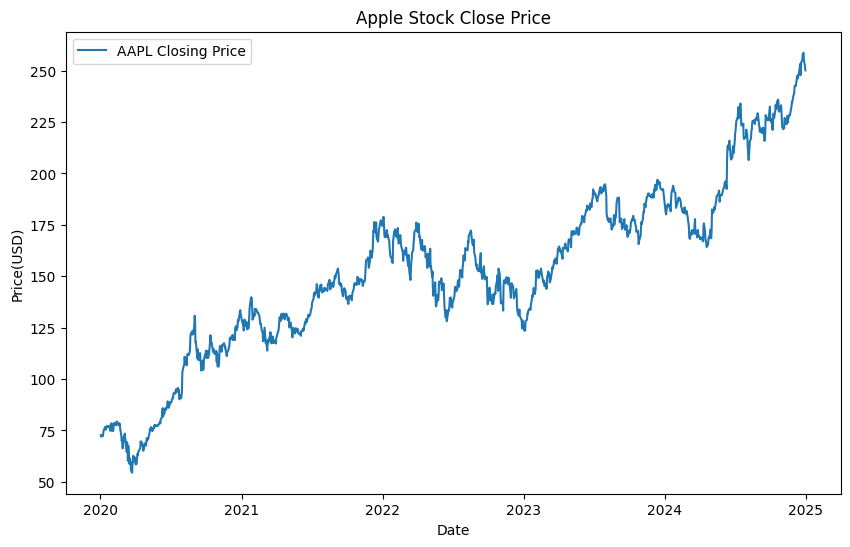

In [ ]:
#Plot it
plt.figure(figsize=(10,6))
plt.plot(stock['Close'], label='AAPL Closing Price')
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

In [ ]:
# We will use the 'yfinance' package to download stock data

#Define the stock ticker symbol (you can change this for any stock)
ticker = "AAPL" #Apple Inc.

#Define the period for which we want the stock data, for example, the last 5 years
start_date = "2018-01-01"
end_date= "2023-01-01"
#Fetch the stock data using yfinance
stock_data= yf.download(ticker, start=start_date, end=end_date)
#Display the first few rows of the data to understand its structure
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479839,40.489241,39.774861,39.986357,102223600
2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
2018-01-05,41.123711,41.210657,40.665476,40.757123,94640000
2018-01-08,40.970978,41.267067,40.872278,40.970978,82271200


In [ ]:
#Calculate daily returns using the 'Close' price
stock_data['Daily_Returns']= stock_data['Close'].pct_change()

#Display the first few rows of the Dataframe to see the calculated returns
stock_data[['Close', 'Daily_Returns']].head()

Price,Close,Daily_Returns
Ticker,AAPL,
Date,,
2018-01-02,40.479839,NaN
2018-01-03,40.472790,-0.000174
2018-01-04,40.660789,0.004645
2018-01-05,41.123711,0.011385
2018-01-08,40.970978,-0.003714


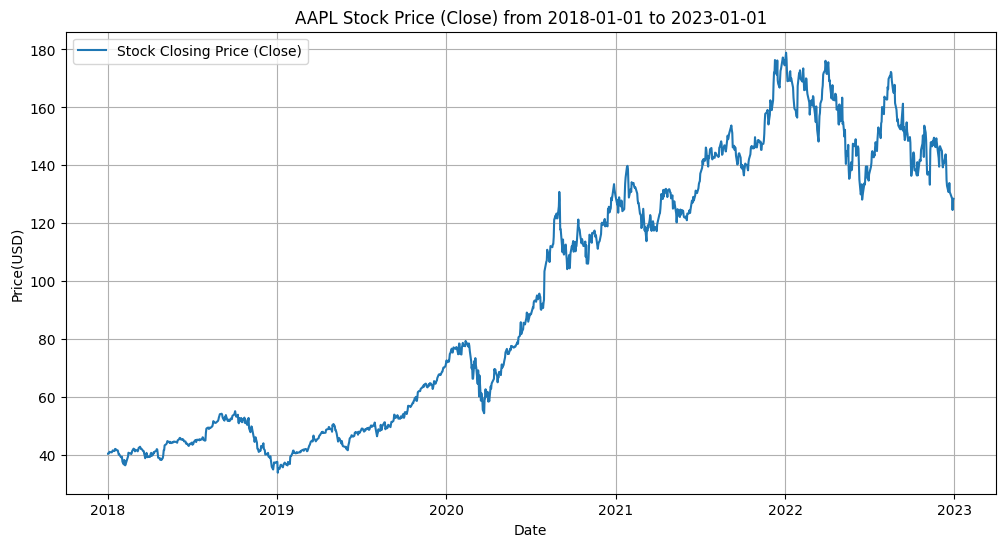

In [ ]:
#Plot the stock's closing price
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Stock Closing Price (Close)')
plt.title(f'{ticker} Stock Price (Close) from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.grid(True)
plt.show()

#JPMorgan 175 Milliobs de dollars

In [ ]:
np.random.seed(42)
n_simulations = 10_000
risk_free_rate = 0.02 #taux sans risque 2%

In [ ]:
# Gen de volatilité
mean_returns = np.random.uniform(0.05, 0.2, n_simulations)
volatilities = np.random.uniform(0.1, 0.35, n_simulations)

In [ ]:
# SHARPE RATIO
sharpe_ratio = (mean_returns - risk_free_rate) / volatilities
print(sharpe_ratio)

[0.54703284 0.30227746 0.45553355 ... 0.48188473 0.33976206 0.53749642]


In [ ]:
best_index = np.argmax(sharpe_ratio)
best_sr = sharpe_ratio[best_index]
best_return = mean_returns [best_index]
best_volatility = volatilities[best_index]

In [ ]:
# Analyse des Sharpe Ratio et Créer un graphique